In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# scipy : optimization, interpolation, 미적분, fft 지원
#         -> 이런 것들을 matlab에서도 지원했다.

In [5]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3) # polyfit : 방정식의 계수를 찾음. 3차원
print(z) # 3차원 + 절편값 -> 4개 출력됨

p = np.poly1d(z) # poly1d : 방정식을 만듦
print("방정식", p)
p(0.5)
p(3.5)
p(10)
p(3.0)

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]
방정식          3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968


0.06825396825396512

-0.7126984126984173


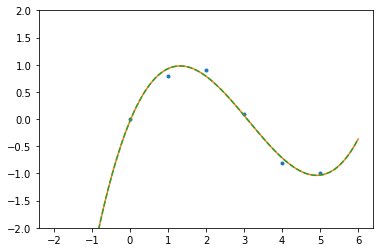

In [8]:
p30 = np.poly1d(np.polyfit(x, y, 3)) # poly1d : 방정식으로 변환
print(p30(4)) # return 방정식으로 구한 값
xp = np.linspace(-2, 6, 100) # ~2에서 6까지 100등분한 수
_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2, 2)
plt.show()

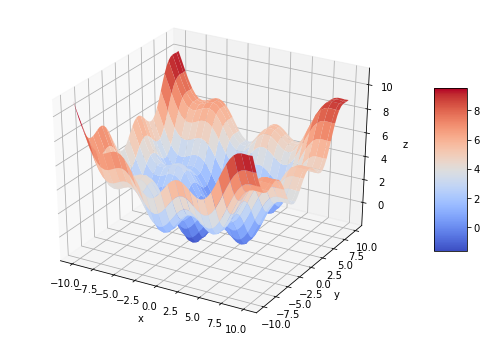

In [14]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
         + np.sin(y) + 0.05 * y ** 2)
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)

X, Y = np.meshgrid(x, y)
Z = fm((X, Y))
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection = "3d")
surf = ax.plot_surface(X, Y, Z, 
                       rstride = 2, cstride = 2, 
                       cmap = mpl.cm.coolwarm, 
                       linewidth = 0.5, antialiased = True)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
# GD : Gradient decent : 경사하강법 => ANN(Artificial Neural Network)
# 지역해 문제 -> momentum으로 해결
# fitting 시간 문제 (= 학습율 문제) -> 처음은 많이, 점점 작게 하여 해결

In [22]:
import scipy.optimize as spo
def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print("%8.4f %8.4f %8.4f" % (x, y, z))
    return z
output = True
opt1 = spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish = None)
print(opt1)

output = False
opt = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish = None)
print(opt1)
# 이제는 ANN으로 최적해를 찾는다.(행렬곱을 이용)

-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120
[0. 0.]
[0. 0.]


In [27]:
output = True
opt2 = spo.fmin(fo, opt1, xtol = 0.001, ftol = 0.001, maxiter = 15, maxfun = 20)
opt2
fm(opt2)
output = False
spo.fmin(fo, (2.0, 2.0), maxiter = 250) # 할강단체법

  0.0000   0.0000   0.0000
  0.0003   0.0000   0.0003
  0.0000   0.0003   0.0003
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
  0.0000   0.0000   0.0000
Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

In [28]:
# 선형회귀(Linear Regression) : 기울기와 절편
# - 통계학에서의 전제조건
#   1) 선형성 - 비선형성 문제 -> scikits에서는 polynomial + Linear Regression으로 해결
#              비선형 -> 과적합 문제가 있으므로 선형성을 갖도록 한다.
#   2) 정규성 - 오차가 정규분포(종 모양)를 띈다.
#   3) 독립성 - 변수 간 다중공산성, 자기회귀
#               - 다중공산성이 있으면 과적합될 문제가 있다.
#                 => scikits에서는 lasso(절대값규제), Ridge(제곱), ElasticNet으로 해결
#               - Regularization : 에러가 이미 존재한다고 보고 회귀
#               - 자기회귀 : 이전 데이터가 다음 데이터에 영향을 미친다.
#                 => Time Series Analysis(시계열분석)
#   4) 등분산성 : 이산성을 고려한 모델을 사용한다.

In [40]:
from sklearn.datasets import make_regression
import statsmodels.api as sm
bias = 100 # bias : 절편
# 속성
# 계수 : 기울기
XO, y, w = make_regression(n_samples = 200, 
                           n_features = 1, 
                           bias = bias, 
                           noise = 10, coef = True, random_state = 1)
print(XO[:5,:])
# 선형 회귀 시 범주형은 상수로 등록한다.(statsmodels에서 회귀 분석 시)
# 상수별로 회귀분석을 실행한다.
X = sm.add_constant(XO) # add_constant : 상수항 결합, 절편을 고려
y = y.reshape(len(y), 1)
w # w=86.4479

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]


array(86.44794301)

In [38]:
import numpy as np
# 행렬곱 연산자 => ANN(Artificial Neural network)
w = np.linalg.inv(X.T @ X) @ X.T @ y # 역행렬
w # w=86.9617

array([[99.79150869],
       [86.96171201]])

In [43]:
import statsmodels.api as sm
# ordinary least square : 회귀모델
# y = ax + b
model = sm.OLS(y, X) # OLS(Ordinary Least Squares, 최소제곱법)
result = model.fit()
print(result.summary())
# << summary() 결과값 >>
# R-squared : 설명력 (=회귀제곱합 / 총 오차제곱합)
# Adj. R-squared : 수정되어진 R-squared값
# F-statistic : 분산비(분산이 이루는 비)
# Prob (F-statistic): 8.17e-182       => 이 model은 유의미하다.
# BIC : model을 평가하는 값. 작을수록 좋다.
# Durbin-Watson : 자기상관성 
#   - 1: 자기상관성X, 0~2: 양의 자기상관성, 2~4: 음의 자기상관성
# Jarque-Bera (JB) : 정규성. 0의 정규성
# Skew : 왜곡?  0.121 -> 약간 비대칭
# Kurtosis : 3.262 -> 정규분포에 약간 벗어나있다.
# Cond. No : 다중공산성. 값이 벗어나면 Warnings 출력

# 기울기, 절편
result.params # 99.79150869(->100에 근사), w=86.9617

# y = 86.9617 * x + 99.79150869

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Mon, 13 Jan 2020   Prob (F-statistic):          8.17e-182
Time:                        13:16:42   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

array([99.79150869, 86.96171201])

In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston =load_boston() # boston 집값에 대한 예측
dfX = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ["MEDV"]) # MEDV:평균값
print(dfX.head())
dfy.head() # 평균값으로 집값 예측

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [54]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [60]:
# 변수가 13개(=len(boston.feature_names)) => 계수
# 독립변수 -> 종속변수
# fit : 계수(parmeter)를 구한다.
model_boston = LinearRegression().fit(boston.data, boston.target)

In [63]:
# 결과 속성 확인(*결과값에는 _(underbar)가 붙는다.)
model_boston.coef_ # coefficient 계수
model_boston.intercept_

36.459488385089855

In [65]:
predictions = model_boston.predict(boston.data)

In [67]:
# 잔차
predictions - boston.target

array([ 6.00384338e+00,  3.42556238e+00, -4.13240328e+00, -4.79296351e+00,
       -8.25647577e+00, -3.44371554e+00,  1.01808268e-01, -7.56401157e+00,
       -4.97636315e+00,  2.02621071e-02,  3.99949651e+00,  2.68679568e+00,
       -7.93478472e-01, -8.47097189e-01,  1.08348205e+00, -6.02516792e-01,
       -2.57249021e+00, -5.88598653e-01, -4.02198894e+00,  2.06136033e-01,
       -1.07614247e+00, -1.92896331e+00,  6.32881292e-01, -6.93714654e-01,
        7.83383155e-02, -5.13314391e-01, -1.13602345e+00, -9.15257194e-02,
        1.14737285e+00, -1.23571798e-01, -1.24488241e+00,  3.55923295e+00,
       -4.38894264e+00,  1.18275814e+00,  2.06758913e-01,  4.91463526e+00,
        2.34193708e+00,  2.10891142e+00, -1.78497388e+00,  5.57625688e-01,
       -6.84897746e-01,  1.42056414e+00, -9.61337195e-02, -9.02072745e-02,
        1.74149176e+00,  2.79669817e+00,  4.23200323e-01,  1.43655088e+00,
       -5.29344623e+00, -2.19392249e+00,  1.58152535e+00,  3.47222285e+00,
        2.65585080e+00,  

In [71]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
z

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [84]:
X = [[0.44, 0.68], [0.99, 0.23]]
y = [109.85, 155.72]
X_test = [[0.49, 0.18]]

In [90]:
# 비선형회귀 = 다차방정식으로 변환 +   LR => 비선형회귀
# 데이터가 2차 => 포물선 형태
# 다차방정식의 특성을 추가
poly = PolynomialFeatures(degree = 2)
# scikits에는 
# - estimator(parameter추정기(기울기,절편 추정))
# - predict(예측)
X_ = poly.fit_transform(X) # fit_transform = fit + transform(변형) 같이 수행
X_test_ = poly.fit_transform(X_test)

In [91]:
lg = LinearRegression() # 선형회귀
lg.fit(X_, y)
lg.coef_ # 다차방정식 계수

array([  0.        ,  19.4606578 , -15.92235638,  27.82874066,
        -2.52988551, -14.48934431])

In [92]:
lg.predict(X_test_) # 비선형예측

array([126.84247142])

C:\Users\ICT01_24\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_24\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


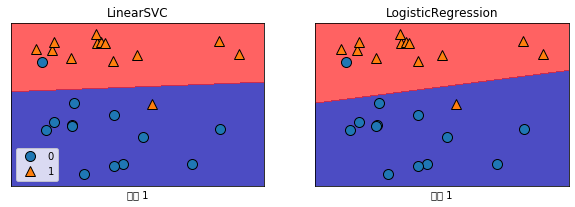

In [97]:
# 로지스틱 회귀분석
# - Logistic function에 의해서 0~1의 값으로 출력
# 분석 => 회귀분석 결과값을 Logistic function값으로 mapping(확률값 0~1)
#  - 0.5를 기준 : 이진
#  - 발전 : 2개 이상의 종속변수인 경우 softmax
# - Logistic : 연속된 독립변수들의 입력 => 이산적 결과로 판정하고 싶을 때
#   Regression(회귀) : 연속된 수치로 입력 => 연속된 수치로 결과
from sklearn.linear_model import LogisticRegression # sklearn : scikits를 package화
from sklearn.svm import LinearSVC
import mglearn
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize = (10,3)) # axes: 도화지
# Support vector classifier (서포트 벡터로 생성된 분류기) >> 분류!!!
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y) # 계수
    mglearn.plots.plot_2d_separator(clf, X, 
                                    fill = True, eps = 0.5, 
                                    ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_xlabel("특성 1")
axes[0].legend() # 범례

In [110]:
# select : model_select, 변수 선택, feature extraction
from sklearn.datasets import load_breast_cancer # 유방암정보(2차원)
from sklearn.model_selection import train_test_split # random
# 0.75, 0.25
# cancer에는 data(독립변수에 대한 관측치), target(종속변수)이 들어있다.
cancer = load_breast_cancer()

print(cancer.feature_names) # 행,열 데이터 - 열이름 : 변수이름
print(cancer.data.shape)
data = pd.DataFrame(cancer.data)
print(data.head())

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, 
                                                    random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)

# score : 정분류율
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))

# 과대적합
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

#   예측    |   실제True    |    실제False
# ---------------------------------------
# Positive  |    TP(=O)           FP(=X)
# Negative  |    TN(=X)           FN(=O)
#     
# 정분류 (TP+FN) / (TP+FP+TN+FN) => 대각선(diag)
# 오분류 (FP+TN) / (TP+FP+TN+FN)
# 정밀도 TP / (TP+FP) => 실제 True 중 맞춘 비율
# 특이도 FN / (FP+FN)
# 신뢰도와 특이도는 대립관계

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)
      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.1

C:\Users\ICT01_24\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [113]:
import numpy as np
from sklearn.model_selection import GroupKFold
X = np.array([[1,2], [3,4], [5,6], [7,8]]) # 변수:2개, 관측치:4개(4x2)
y = np.array([1,2,3,4])
groups = np.array([0,0,2,2]) # 그룹을 구분
group_kfold = GroupKFold(n_splits = 2)
group_kfold.get_n_splits(X, y, groups)
print(group_kfold)

for train_index, test_index in group_kfold.split(X, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

GroupKFold(n_splits=2)
TRAIN: [0 1] TEST: [2 3]
[[1 2]
 [3 4]] [[5 6]
 [7 8]] [1 2] [3 4]
TRAIN: [2 3] TEST: [0 1]
[[5 6]
 [7 8]] [[1 2]
 [3 4]] [3 4] [1 2]


In [119]:
# feature_selection
from sklearn.datasets import make_friedman1 # 데이터 생성
# 재귀적으로 특징을 제거한다. => RFE(Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.svm import SVR                 # SVR:Regression->예측, SVC:Classification->분류
X, y = make_friedman1(n_samples = 50, n_features = 10, random_state = 0)
estimator = SVR(kernel = "linear")
selector = RFE(estimator, 5, step = 1) # 변수를 5개만 남기겠다. step : 한번에 하나씩 제거
# 변수를 제거하는 이유 - 잡음(Noise) 제거

selector = selector.fit(X, y)
selector.support_
selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

In [122]:
# Text mining => vectorizing
# problem of evil queen
sample = ["problem of evil", "evil queen", "horizon problem"]

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
print(type(X))

# 배열
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>


,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
# Term Frequency(단어 빈도) + Inverse Document Frequency(역문서빈도)
# 단어수 / 전체문서 => 전체문서 / 단어수
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [133]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0,2,1,3]
y_true = [0,1,2,3]
accuracy_score(y_true, y_pred, normalize = False) # 정확도 0.5

0.5

In [136]:
# SVC
# Cross validation : 5데이터를 5덩어리로 나눔
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X, y = iris.data, iris.target
# support vector
# 커널의 모양 통제
clf = svm.SVC(gamma = "scale", random_state = 0) # 모델을 가리키는 이름
cross_val_score(clf, X, y, scoring = "recall_macro", cv = 5)
# 민감도, 결과도 5개

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [138]:
# 척도
from sklearn.metrics import confusion_matrix
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]
confusion_matrix(y_true, y_pred) # 혼동행렬

# 개수
#    0, 1, 2
# 0  2  
# 1  0 
# 2  0     2

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [163]:
import numpy as np
import sklearn.metrics as metrics
y = np.array([1,1,1,1,0,0]) # 실제값
p = np.array([1,1,0,0,0,0]) # 예측값
accuracy = np.mean(np.equal(y, p)) # 정확도
right = np.sum(y * p == 1)         # 1과 같은 것
precision = right / np.sum(p)      # 정밀도 = TP / (TP + FP)
recall = right / np.sum(y)         # 민감도 = TP / (TP + TN)
f1 = 2 * precision * recall / (precision + recall)

print("accuracy", metrics.accuracy_score(y,p))
print("precision", metrics.precision_score(y,p))
print("recall", metrics.recall_score(y,p))
print("f1_score", metrics.f1_score(y,p))
print(metrics.classification_report(y,p))
print(metrics.confusion_matrix(y,p)) # 혼동행렬

accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1_score 0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

[[2 0]
 [2 2]]


In [173]:
# 문제
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples = 16, n_features = 2, 
                           n_informative = 2, n_redundant = 0, random_state = 0)

print(X[:5, :]) # 16 x 2
print(X.shape)
# 1) LogisticRegression을 실시하시요.
model_Xy = LogisticRegression().fit(X, y) # 게수 완성

# 2) 훈련데이터를 예측하시요.
pred = model_Xy.predict(X)

# 3) 결과를 평가하시요(precision, recall, f1_score)
print("precision(정밀도) :", metrics.precision_score(y, pred))
print("recall(민감도) :", metrics.recall_score(y, pred))
print("f1_score :", metrㄴics.f1_score(y, pred))
print(metrics.classification_report(y, pred))
print(metrics.confusion_matrix(y, pred, labels=[1,0])) # 혼동행렬

[[ 2.03418291 -0.38437236]
 [ 4.06377686  0.17863836]
 [ 0.41966783 -1.38206096]
 [-1.27225991  0.6600493 ]
 [-0.81664689  1.16942291]]
(16, 2)
precision(정밀도) : 0.8571428571428571
recall(민감도) : 0.75
f1_score : 0.7999999999999999
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.86      0.75      0.80         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16

[[6 2]
 [1 7]]


C:\Users\ICT01_24\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
